In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
image=cv2.imread('./Photos/image_test16.png')
image_resize=cv2.resize(image,(400,400))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb_resize=cv2.resize(image_rgb,(400,400))
image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)



In [3]:
lower=np.asarray([70,0,0])
upper=np.asarray([255,255,180])

# lower=np.asarray([35,16,38])
# upper=np.asarray([255,75,255])  #edit with a video

mask=cv2.inRange(image_rgb_resize,lower,upper)
output = cv2.bitwise_and(image_resize, image_resize, mask = mask)


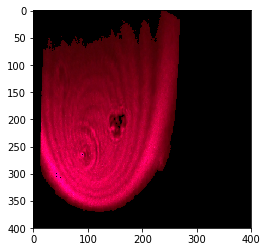

In [4]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.imshow('masking',output)
# cv2.waitKey(0)

In [5]:
kernel = np.ones((5,5),np.uint8)
kernel2=cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))


closing = cv2.morphologyEx(image_resize, cv2.MORPH_CLOSE, kernel)
erosion = cv2.dilate(closing,kernel2,iterations = 1)
opening = cv2.morphologyEx(image_resize, cv2.MORPH_OPEN, kernel)


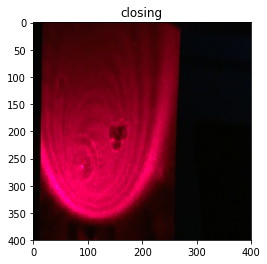

In [6]:
plt.figure(1)

plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))

plt.title('closing')
plt.show()

In [7]:
closing_Re=cv2.resize(image_resize,(400,400));

copy_closing1=closing_Re.copy();
copy_closing2=closing_Re.copy();
gray_output= cv2.cvtColor(closing_Re, cv2.COLOR_BGR2GRAY)
gray_output=cv2.resize(gray_output,(400,400))

# gray_filter = cv2.bilateralFilter(gray_output, 10, 10, 10)   TRY EROSION 

# edges=cv2.Canny(gray_filter,100,100)  ## temporary function-: checking edges accuracy




kernel = np.ones((14,14),np.uint8)  #Earlier 13, 13  We can't change these valued
opening2 = cv2.morphologyEx(gray_output, cv2.MORPH_OPEN, kernel)



ret,thresh1 = cv2.threshold(opening2,30,255,cv2.THRESH_BINARY)
# kernel = np.ones((4,4),np.uint8)
# dilation=cv2.dilate(thresh1,kernel,iterations=1)
# erosion = cv2.erode(thresh1,kernel,iterations = 1)

[_,contours, heir]=cv2.findContours(thresh1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy_closing1, contours, -1, (0,255,0), 1)

cv2.imshow('grayscale',gray_output)
cv2.imshow('Binary_image',thresh1)
# cv2.imshow('Erosion',erosion)
# cv2.imshow('Dilation',dilation)'
cv2.imshow('open',opening2)
cv2.imshow('contours',copy_closing1)
# cv2.imshow('Bilaterial filter',edges)
cv2.waitKey(0)

44

In [8]:

###### Editing with video
# closing_Re=cv2.resize(output,(400,400));

# copy_closing1=closing_Re.copy();
# copy_closing2=closing_Re.copy();
# gray_output= cv2.cvtColor(closing_Re, cv2.COLOR_BGR2GRAY)
# gray_output=cv2.resize(gray_output,(400,400))


# gray_filter = cv2.bilateralFilter(gray_output, 10, 10, 10)

# edges=cv2.Canny(gray_filter,100,100)  ## temporary function-: checking edges accuracy

# # ret,thresh1 = cv2.threshold(gray_filter,40,255,cv2.THRESH_BINARY)


# kernel = np.ones((5,5),np.uint8)
# opening2 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

# [_,contours, heir]=cv2.findContours(opening2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(copy_closing1, contours, -1, (0,255,0), 1)

# cv2.imshow('grayscale',gray_output)
# cv2.imshow('Binary_image',thresh1)
# cv2.imshow('opening_image',opening2)
# cv2.imshow('contours',copy_closing1)
# cv2.imshow('Bilaterial filter',gray_filter)
# cv2.waitKey(0)

In [9]:
print "Expected ratio = ",4*math.pi; 
Expected_ratio= 4*math.pi
circular=[]
radius1=[]



for cnt in contours:
    
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    rad=perimeter/(2*(math.pi+1e-4))
    ratio=(perimeter**2)/(area+1e-4)
    print Expected_ratio-ratio, rad
    if rad>2.5 and rad<30:
        print rad
        radius1.append(rad)
        circular.append(cnt)


Expected ratio =  12.5663706144
-15.52661932 195.570165859
-11.7601982741 20.0048983211
20.0048983211


In [10]:
cv2.drawContours(copy_closing2, circular, -1, (0,255,0), 1)

cv2.imshow('contours_circular',copy_closing2)
cv2.waitKey(0)

112

In [11]:
radius1

[]